In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('data/output_data.csv')
data['price_diff'] = data['output_own_price'] - data['output_comp_price']
data['total_sales'] = data['output_own_sales'] / data['output_own_share']

months_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
data['index_month'] = data['output_date'].apply(lambda x: x[2:5]).map(months_map).astype(int)
data['index_day'] = data['output_date'].apply(lambda x: x[0:2]).astype(int)

num_cols = data.select_dtypes(include='number')

In [43]:
data

,mkt_id,output_date,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales,price_diff,total_sales,index_month,index_day
0,44,01jan2019,7.05,5.90,7.11,15.065000,42.80,0.515267,13.10,-0.06,25.423698,1,1
1,44,02jan2019,7.05,6.05,7.11,24.310000,36.14,0.557082,24.31,-0.06,43.638108,1,2
2,44,03jan2019,7.05,5.98,7.28,30.783910,34.34,0.579922,28.77,-0.23,49.610146,1,3
3,44,04jan2019,7.05,5.98,7.28,20.169500,36.32,0.542767,18.85,-0.23,34.729426,1,4
4,44,05jan2019,6.79,6.07,6.68,1.231200,44.06,0.494757,1.71,0.11,3.456245,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19705,15555,27dec2019,7.28,5.96,7.30,26.070000,36.68,0.515118,19.75,-0.02,38.340759,12,27
19706,15555,28dec2019,6.69,5.94,6.64,3.720000,34.34,0.497312,4.96,0.05,9.973620,12,28
19707,15555,29dec2019,6.69,5.91,6.64,3.393001,32.00,0.424593,4.35,0.05,10.245098,12,29
19708,15555,30dec2019,7.31,5.99,7.42,31.561200,31.10,0.465712,23.91,-0.11,51.340710,12,30


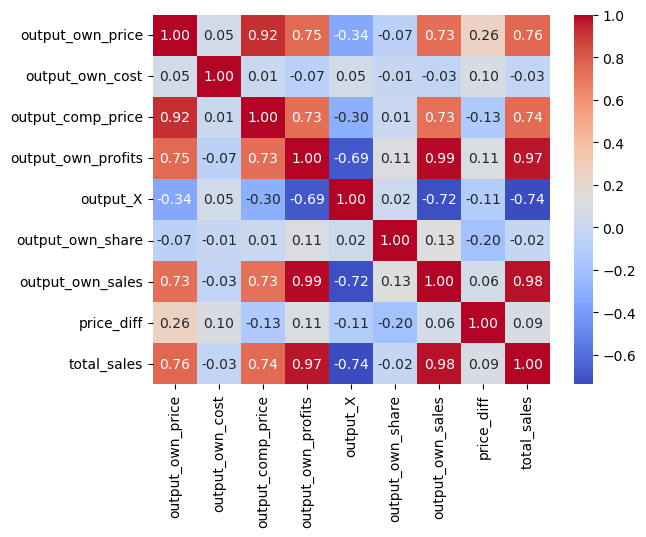

In [4]:
# Calculate correlation matrix
corr_matrix = num_cols.loc[num_cols['mkt_id']==44].corr().drop('mkt_id', axis=1).drop('mkt_id', axis=0)

# Create heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show plot
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

X = data[['output_X', 'output_own_share']].copy()
Y = data['output_own_profits'].copy()

reg = LinearRegression().fit(X, Y)

In [6]:
reg.coef_

array([-0.47368858, 14.9969087 ])

## Modelling total sales

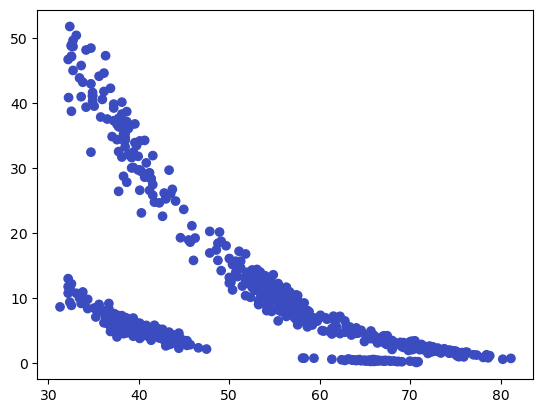

In [61]:
data_for_plot = data.loc[data['index_day']==17]
plt.scatter(data_for_plot['output_X'], data_for_plot['total_sales'], c=data_for_plot['index_day'], cmap='coolwarm')
# data.loc[data['mkt_id']==15555].plot(x=['output_X', 'output_own_price'], y='total_sales', kind='scatter')

Low sales
mkt_id                5256.460215
output_own_price         6.741004
output_own_cost          6.001333
output_comp_price        6.741527
output_own_profits       3.099208
output_X                35.111742
output_own_share         0.499103
output_own_sales         4.187971
price_diff              -0.000523
total_sales              8.375357
index_month              5.844444
index_day               16.088172
dtype: float64
1395
High sales
mkt_id                5321.067101
output_own_price         7.244961
output_own_cost          5.998720
output_comp_price        7.251092
output_own_profits      25.793546
output_X                35.226381
output_own_share         0.500856
output_own_sales        20.613472
price_diff              -0.006131
total_sales             41.148093
index_month              5.428416
index_day               15.305895
dtype: float64
3681


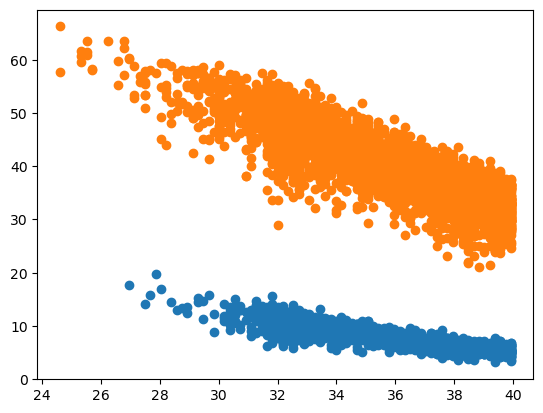

In [62]:
data_1 = num_cols.loc[(num_cols['total_sales']<20) & (num_cols['output_X']<40)]
data_2 = num_cols.loc[(num_cols['total_sales']>20) & (num_cols['output_X']<40)]

print('Low sales')
print(data_1.mean())
print(len(data_1))
plt.scatter(data_1['output_X'], data_1['total_sales'])

print('High sales')
print(data_2.mean())
print(len(data_2))
plt.scatter(data_2['output_X'], data_2['total_sales'])

# MLE on the share of sales (Normal distr) given price difference

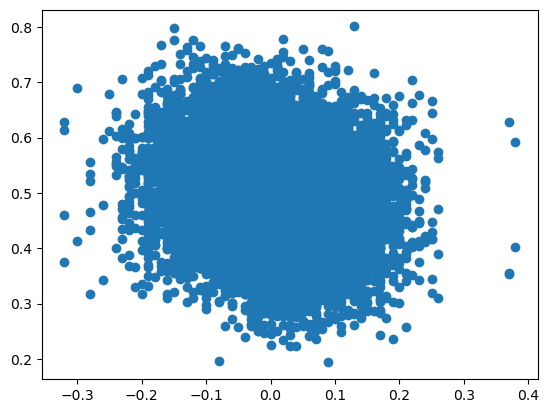

In [ ]:
plt.scatter(data['price_diff'], data['output_own_share'])

(array([  3.,   1.,  10.,  10.,  17.,  26.,  33.,  77., 115., 137., 169.,
        141., 107.,  94.,  67.,  30.,  27.,  11.,   4.,   1.]),
 array([0.2257144 , 0.2511422 , 0.27656999, 0.30199779, 0.32742558,
        0.35285338, 0.37828117, 0.40370897, 0.42913676, 0.45456456,
        0.47999235, 0.50542014, 0.53084794, 0.55627574, 0.58170353,
        0.60713132, 0.63255912, 0.65798692, 0.68341471, 0.70884251,
        0.7342703 ]),
 <BarContainer object of 20 artists>)

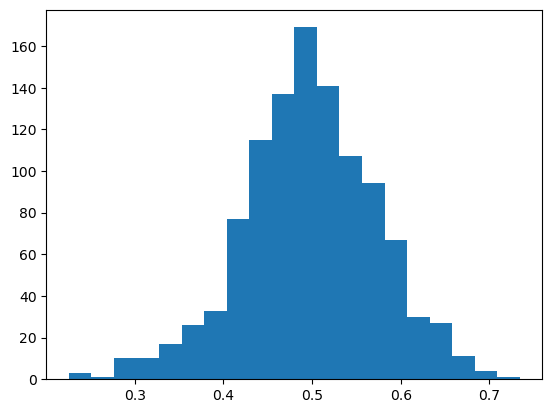

In [14]:
plt.hist(data.loc[data['price_diff']==0]['output_own_share'], bins=20)